11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.8746 - loss: 0.4024 - val_accuracy: 0.9824 - val_loss: 0.0501
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9834 - loss: 0.0523 - val_accuracy: 0.9893 - val_loss: 0.0377
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9887 - loss: 0.0360 - val_accuracy: 0.9885 - val_loss: 0.0360
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.9907 - loss: 0.0303 - val_accuracy: 0.9912 - val_loss: 0.0279
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9883 - val_loss: 0.0346
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9849 - loss: 0.0450
Test accuracy: 0.9883000254631042


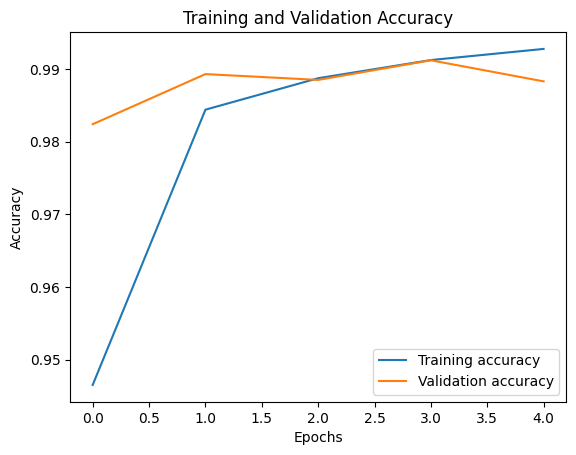

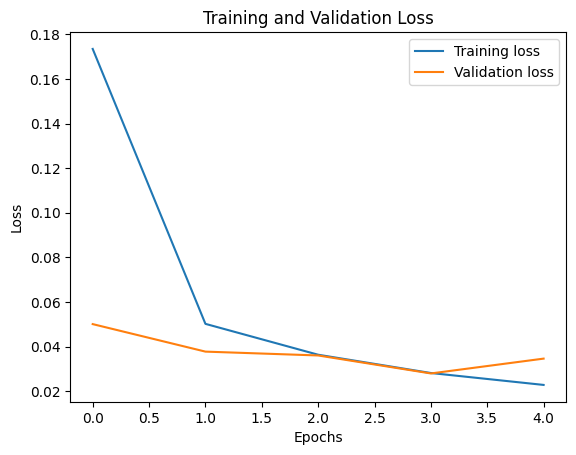

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Predicted class: 7


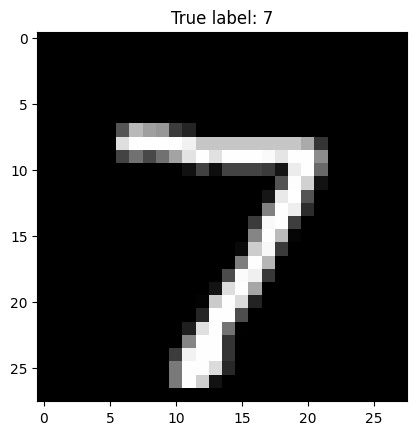

In [1]:
#Lab-7
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to be in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to match the input format for CNN: (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output of the convolutional layers
    layers.Flatten(),

    # Fully Connected Layer
    layers.Dense(64, activation='relu'),

    # Output Layer (10 units for 10 digits, softmax activation)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test)

# Show the predicted class for the first test image
predicted_class = predictions[0].argmax()
print(f"Predicted class: {predicted_class}")

# Show the first test image and the true label
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"True label: {y_test[0].argmax()}")
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0174 - val_loss: 0.0026
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 9.1073e-04 - val_loss: 0.0038
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 8.6988e-04 - val_loss: 0.0017
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 9.6002e-04 - val_loss: 0.0033
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 8.0412e-04 - val_loss: 0.0017
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 9.0103e-04 - val_loss: 0.0029
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 7.4094e-04 - val_loss: 0.0017
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 8.1065e-04 - val_loss: 0.0023


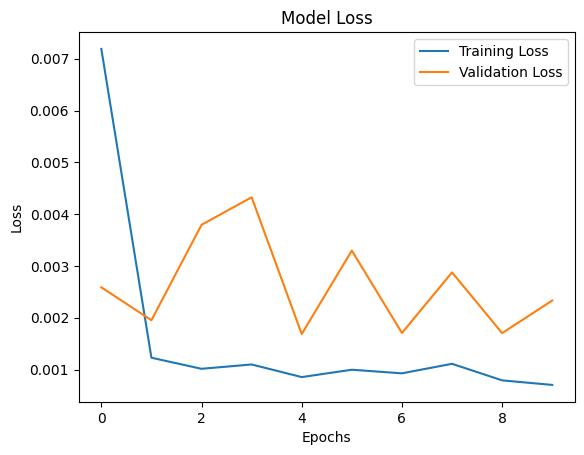

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


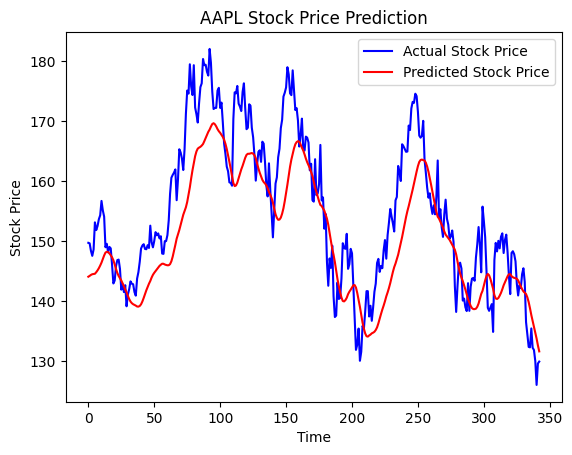

RMSE: 7.700421513155388


In [3]:
#Lab-10
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

# Fetch historical stock data using yfinance
stock_symbol = 'AAPL'  # You can change this to any stock symbol
start_date = '2015-01-01'
end_date = '2023-01-01'

# Download stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Use only the 'Close' price for prediction
close_price = data['Close'].values
close_price = close_price.reshape(-1, 1)

# Normalize the 'Close' price between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_price)

# Create a dataset where each input is a sequence of previous 60 days and the target is the next day's closing price
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create datasets for training and testing
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the data to be compatible with LSTM input: (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test data
predictions = model.predict(X_test)

# Invert the scaling to get the actual stock price
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
print(f"RMSE: {rmse}")
